In [1]:
import numpy as np
import pandas as pd


In [2]:
train=pd.read_csv('ml2_train.csv')
test=pd.read_csv('ml2_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 15 columns):
Serial Number       3790 non-null int64
Main Office         3790 non-null int64
Branch Number       3790 non-null int64
Established Date    3790 non-null object
Acquired Date       2297 non-null object
City                3790 non-null object
County              3790 non-null object
State               3790 non-null object
2010 Deposits       3050 non-null float64
2011 Deposits       3212 non-null float64
2012 Deposits       3461 non-null float64
2013 Deposits       3615 non-null float64
2014 Deposits       3734 non-null float64
2015 Deposits       3771 non-null float64
2016 Deposits       3790 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 444.2+ KB


In [3]:
train.head()

,Serial Number,Main Office,Branch Number,Established Date,Acquired Date,City,County,State,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,1,0,2866,02/06/1910,11/13/2004,Wales,Waukesha,WI,21386.0,23981.0,24825.0,26908.0,30681.0,30680.0,37564
1,2,0,2867,02/28/1910,11/13/2004,Germantown,Washington,WI,55454.0,56564.0,64732.0,73523.0,81357.0,89270.0,106177
2,3,0,2868,05/06/1907,11/13/2004,Brookfield,Waukesha,WI,90882.0,104300.0,125038.0,125906.0,132501.0,137363.0,145054
3,4,0,2869,06/20/1936,11/13/2004,Pewaukee,Waukesha,WI,45674.0,49288.0,53251.0,70402.0,74742.0,73837.0,85996
4,5,0,2870,04/22/1963,11/13/2004,Waukesha,Waukesha,WI,64181.0,72217.0,69920.0,80703.0,75971.0,73225.0,81706


In [4]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Serial Number,3790,NaN,NaN,NaN,1895.5,1094.22,1,948.25,1895.5,2842.75,3790
Main Office,3790,NaN,NaN,NaN,0,0,0,0,0,0,0
Branch Number,3790,NaN,NaN,NaN,5390.81,1549.11,2866,4062.25,5256.5,6858.25,7989
Established Date,3790,2027,01/01/1919,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acquired Date,2297,5,09/25/2008,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3790,1489,Chicago,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,3790,299,Los Angeles,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,3790,25,CA,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 Deposits,3050,NaN,NaN,NaN,112213,2.79759e+06,0,18932,35628,66072.8,1.53577e+08
2011 Deposits,3212,NaN,NaN,NaN,125514,3.44738e+06,0,20132.8,37183,66947,1.94388e+08


In [24]:
train['2016 Deposits'].value_counts(normalize=True)

0         0.013193
51035     0.000528
34633     0.000528
89017     0.000528
33854     0.000528
66634     0.000528
120483    0.000528
30172     0.000528
31846     0.000528
62561     0.000528
49415     0.000528
49435     0.000528
48291     0.000528
65951     0.000528
45501     0.000528
43454     0.000528
49607     0.000528
37608     0.000528
37737     0.000528
59814     0.000528
107203    0.000528
150630    0.000528
25775     0.000528
40156     0.000528
79073     0.000528
37023     0.000528
24546     0.000528
61344     0.000528
25171     0.000528
32924     0.000528
            ...   
144532    0.000264
95436     0.000264
52439     0.000264
37615     0.000264
62712     0.000264
178611    0.000264
85263     0.000264
64781     0.000264
81860     0.000264
93447     0.000264
116177    0.000264
27907     0.000264
132354    0.000264
62720     0.000264
34042     0.000264
71251     0.000264
132342    0.000264
95448     0.000264
122101    0.000264
62708     0.000264
72941     0.000264
54508     0.

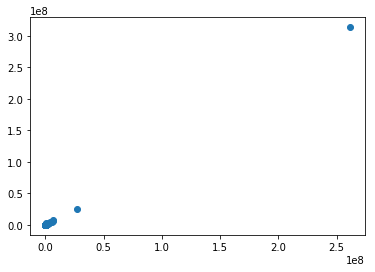

In [47]:
# train['2016 Deposits'].plot()
import matplotlib.pyplot as plt
plt.scatter(train['2015 Deposits'],train['2016 Deposits'])


C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


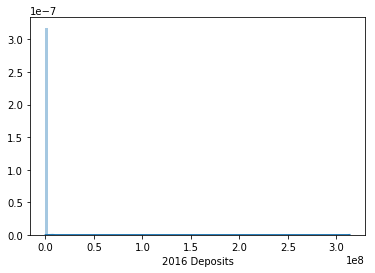

In [101]:
sns.distplot(train['2016 Deposits'],bins=100)

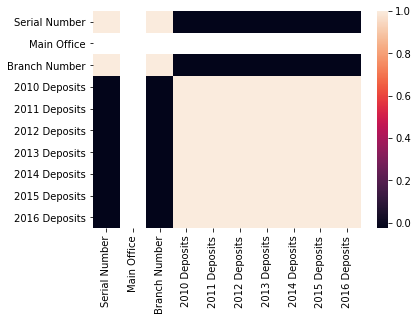

In [5]:
import seaborn as sns
%matplotlib inline
sns.heatmap(train.corr())

In [6]:
train.columns

Index(['Serial Number', 'Main Office', 'Branch Number', 'Established Date',
       'Acquired Date', 'City', 'County', 'State', '2010 Deposits',
       '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits'],
      dtype='object')

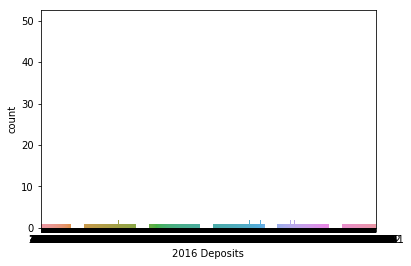

In [50]:
import seaborn as sns
sns.countplot(train['2016 Deposits'])

In [60]:
dftrain=train.drop(['Serial Number','Main Office', 'Branch Number', 'Established Date',
       'Acquired Date', 'City', 'County', 'State'],axis=1)
# dftrain.fillna(0,inplace=True)
dftrain.dropna(inplace=True)
dftrain.shape

(3050, 7)

In [61]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Serial Numer,1623,NaN,NaN,NaN,812,468.664,1,406.5,812,1217.5,1623
Main Office,1623,NaN,NaN,NaN,0.000616143,0.0248222,0,0,0,0,1
Branch Number,1623,NaN,NaN,NaN,1765.31,751.636,0,1328,1829,2386.5,2865
Established Date,1623,1358,01/01/1800,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acquired Date,1501,14,11/13/2004,1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1623,693,New York City,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,1623,180,Maricopa,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,1623,14,NY,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 Deposits,1623,NaN,NaN,NaN,557494,1.57763e+07,0,33856.5,65719,120904,6.33131e+08
2011 Deposits,1623,NaN,NaN,NaN,656502,1.85481e+07,0,35535.5,68980,129264,7.43268e+08


In [62]:
dftest=test.drop(['Serial Numer','Main Office', 'Branch Number', 'Established Date',
       'Acquired Date', 'City', 'County', 'State'],axis=1)
dftest.fillna(0,inplace=True)


In [94]:
X=dftrain.drop('2016 Deposits',axis=1)
y=dftrain['2016 Deposits']
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
rf=RandomForestRegressor(n_estimators=50,max_features=4)
rf.fit(X,y)
pr=rf.predict(dftest)

# dc=DecisionTreeRegressor(max_features=4)
# dc.fit(X,y)
# pr=dc.predict(dftest)


# lr=Ridge()
# lr.fit(X,y)
# pr=lr.predict(dftest)

In [95]:
pr

array([2.00680159e+08, 3.65977740e+05, 2.98005020e+05, ...,
       1.05175140e+05, 9.29756400e+04, 2.79840200e+04])

In [96]:
s=pd.DataFrame({'Serial Number':test['Serial Numer'],'Deposits 2016':pr})
s.head()
# s.to_csv('toexcel.csv',index=False)

,Serial Number,Deposits 2016
0,1,2.006802e+08
1,2,3.659777e+05
2,3,2.980050e+05
3,4,1.306957e+05
4,5,2.461033e+05


In [97]:
s['Deposits 2016'].value_counts(normalize=True)

0.00           0.057301
17544006.22    0.001848
24672.76       0.000616
161644.18      0.000616
64171.00       0.000616
122266.90      0.000616
161380.60      0.000616
73026.94       0.000616
125603.28      0.000616
54221.20       0.000616
157466.32      0.000616
194223.10      0.000616
216919.50      0.000616
193536.14      0.000616
302411.74      0.000616
104372.96      0.000616
79742.88       0.000616
356779.86      0.000616
127535.84      0.000616
81765.82       0.000616
102815.14      0.000616
144187.50      0.000616
72918.80       0.000616
158781.58      0.000616
49086.44       0.000616
87398.10       0.000616
664993.72      0.000616
224338.28      0.000616
97959.24       0.000616
245582.56      0.000616
                 ...   
107328.14      0.000616
34338.28       0.000616
132463.96      0.000616
280038.46      0.000616
179134.34      0.000616
126277.60      0.000616
99917.84       0.000616
405303.38      0.000616
114939.96      0.000616
78151.56       0.000616
28603.38       0

In [87]:
s1=s[(s['Deposits 2016']>=20000) & (s['Deposits 2016']<90000)]#.sort_values(by=['Deposits 2016','Serial Number'])
s2=s[s['Deposits 2016']<20000 ]#.sort_values(by=['Deposits 2016','Serial Number'])
s3=s[s['Deposits 2016']>=90000 ]#.sort_values(by=['Deposits 2016','Serial Number'])

In [88]:
print(s1.shape)
print(s2.shape)
print(s3.shape)

(619, 2)
(127, 2)
(877, 2)


In [89]:
s1.to_csv('toexcel1.csv',index=False)
s2.to_csv('toexcel2.csv',index=False)
s3.to_csv('toexcel3.csv',index=False)

In [74]:
sub=pd.DataFrame(columns=s.columns,index=s.index)
sub=s1.append(s2)
sub=sub.append(s3)
# sub=sub.append(s3)


In [75]:
sub.shape

(1623, 2)

In [76]:
sub

,Serial Number,Deposits 2016
314,315,20036.0
948,949,20036.0
946,947,20564.0
1520,1521,20564.0
975,976,21241.0
1353,1354,21717.0
1414,1415,21717.0
1597,1598,21795.0
718,719,22048.0
716,717,22090.0


In [77]:
sub.to_csv('basic3.csv',index=False)

In [25]:
s1=pd.DataFrame({'Serial Number':test['Serial Numer'],'Deposits 2016':[0]*len(test)}).sort_values('Serial Number')
s1.head()

,Serial Number,Deposits 2016
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [26]:
s1.to_csv('zero.csv',index=False)